In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import os
import random

from tensorflow import keras
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [8]:
def set_seed(seed: int = 42) -> None:
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)
  tf.experimental.numpy.random.seed(seed)
  tf.random.set_seed(seed)
  os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
  os.environ['TF_DETERMINISTIC_OPS'] = '1'
  # Set a fixed value for the hash seed
  os.environ["PYTHONHASHSEED"] = str(seed)
  print(f"Random seed set as {seed}")

In [9]:
def plot_curve(history):
    history_df = pd.DataFrame(history.history)

    fig, ax = plt.subplots(1,2, figsize = (10,4))

    sns.lineplot(data = history_df,x = history_df.index+1, y = "loss", label = "training_loss", ax = ax[0])
    sns.lineplot(data = history_df,x = history_df.index+1, y = "val_loss", label = "validation_loss",ax = ax[0])


    sns.lineplot(data = history_df,x = history_df.index+1, y = "accuracy", label = "training_accuracy", ax = ax[1])
    sns.lineplot(data = history_df,x = history_df.index+1, y = "val_accuracy", label = "validation_accuracy", ax = ax[1])

    fig.suptitle("loss & accuracy curve plot")
    plt.tight_layout()
    plt.show()

## load dataset

In [10]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [11]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


In [12]:
# images in pixels value it gives 3d array.
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [30]:
# show row by row pixels of 2nd index image.
X_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

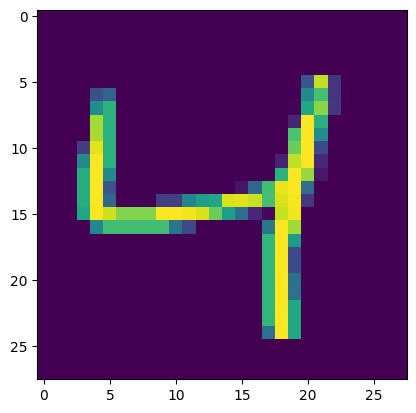

In [14]:
plt.imshow(X_train[2])

In [15]:
X_train = X_train/255
X_test = X_test/255

## Applying keras sequential model.

In [44]:
from keras.layers import Dense
model = keras.Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(90, activation = 'relu'))
model.add(Dense(79, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))

model.add(Dense(50, activation = 'relu'))

model.add(Dense(32, activation = 'relu'))

model.add(Dense(10, activation="softmax"))


In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 90)                70650     
                                                                 
 dense_15 (Dense)            (None, 79)                7189      
                                                                 
 dense_16 (Dense)            (None, 60)                4800      
                                                                 
 dense_17 (Dense)            (None, 50)                3050      
                                                                 
 dense_18 (Dense)            (None, 32)                1632      
                                                                 
 dense_19 (Dense)            (None, 10)               

In [46]:
model.compile(

    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'

)

In [47]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3105 - accuracy: 0.9059 - val_loss: 0.1472 - val_accuracy: 0.9545
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1316 - accuracy: 0.9606 - val_loss: 0.1263 - val_accuracy: 0.9611
Epoch 3/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0952 - accuracy: 0.9708 - val_loss: 0.1296 - val_accuracy: 0.9616
Epoch 4/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0752 - accuracy: 0.9766 - val_loss: 0.1236 - val_accuracy: 0.9645
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0620 - accuracy: 0.9807 - val_loss: 0.1065 - val_accuracy: 0.9699
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9833 - val_loss: 0.1143 - val_accuracy: 0.9704
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0465 - accuracy: 0.9854 - val_loss: 0.1230 - val_accuracy:

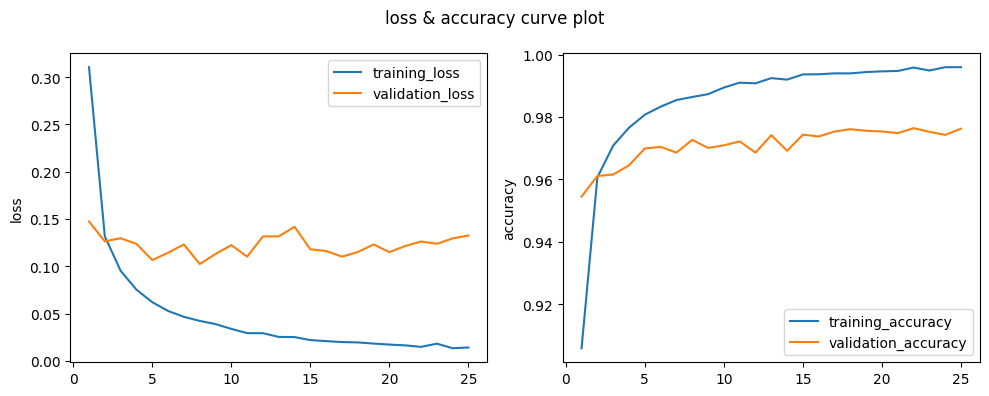

In [48]:
plot_curve(history)

## Predict data

In [49]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [50]:
# find max value for every index
y_pred = y_prob.argmax(axis=1)

In [51]:
#testing the accuracy of prediction
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9766

<hr style= color:cyan>

# <center><b> Testing Section </b>

<hr style= color:cyan>

# Test-1

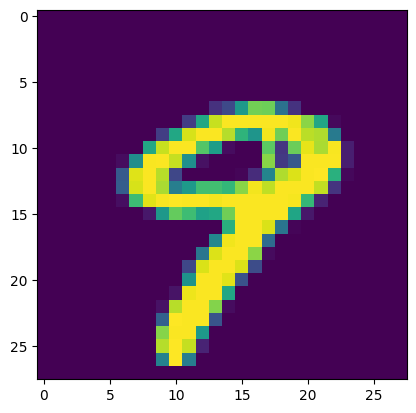

In [52]:
plt.imshow(X_test[9])

In [53]:
output1 = model.predict(X_test[9].reshape(1,28,28)).argmax(axis=1)
print("---> ", output1)


1/1 [==============================] - 0s 21ms/step
--->  [9]


<hr style= color:black>

## Test-2 

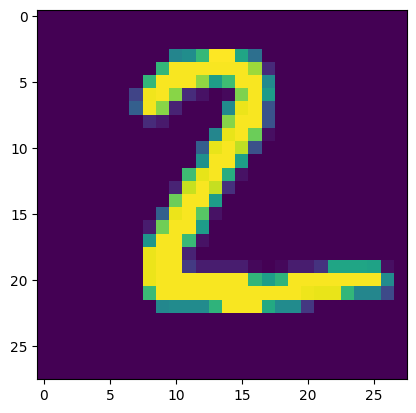

In [54]:
plt.imshow(X_test[1])

In [55]:
output2 = model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)
print("---> ",output2)

1/1 [==============================] - 0s 14ms/step
--->  [2]


<hr style= color:black>

## Test-3

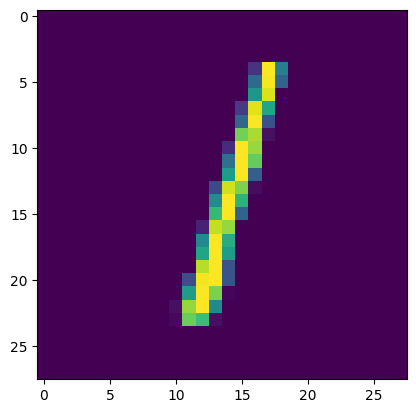

In [56]:
plt.imshow(X_test[2])

In [57]:
output2 = model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)
print("---> ",output2)

1/1 [==============================] - 0s 30ms/step


--->  [1]


<hr style=color:cyan>

<hr style=color:cyan>